In [2]:
from tqdm import tqdm
import torch.nn
ranges=[i*0.01 for i in range(20)]
d=dict(zip(ranges,ranges))
d

{0.0: 0.0,
 0.01: 0.01,
 0.02: 0.02,
 0.03: 0.03,
 0.04: 0.04,
 0.05: 0.05,
 0.06: 0.06,
 0.07: 0.07,
 0.08: 0.08,
 0.09: 0.09,
 0.1: 0.1,
 0.11: 0.11,
 0.12: 0.12,
 0.13: 0.13,
 0.14: 0.14,
 0.15: 0.15,
 0.16: 0.16,
 0.17: 0.17,
 0.18: 0.18,
 0.19: 0.19}

In [7]:

a= None
z={**a}

TypeError: 'NoneType' object is not a mapping

In [8]:
z

{'None': None}

In [1]:
import numpy as np
noise = np.random.normal(0, 1, (3, 3))
noise = noise * 300

In [2]:
noise

array([[-181.94350371,  415.27690314,  -89.67023644],
       [ 128.2958175 ,  110.75466411, -412.46754734],
       [ -81.58358781,  -70.70431396,  185.629952  ]])

In [13]:
from tool import mltk
class Restorer:

    def __init__(self, varName):
        self.varName = varName

    def __enter__(self):
        self.oldValue = globals()[self.varName]

    def __exit__(self, exc_type, exc_val, exc_tb):
        globals()[self.varName] = self.oldValue

In [23]:
x=[12]

In [24]:
print(globals()['x'])

[12]


In [25]:
with Restorer('x'):
    x.append(0)
    # x=[10]
    print(x)
print(x)

[12, 0]
[12, 0]


In [1]:
class ABC:
    def __init__(self,data):
        self.data=data

def c_fun():
    print('i am cfun')

c_fun()

i am cfun


In [2]:
my_hook_target_function_name = 'c_fun'
hook_function_tmp_storage = eval(my_hook_target_function_name)
def _hook_target_function_replacement(*args, **kwargs):
    hook_function_tmp_storage(*args, **kwargs)
    # do your things
    info = 'hook method [' + my_hook_target_function_name + ']...'
    print('after cfun')
exec(my_hook_target_function_name + '=_hook_target_function_replacement')

In [3]:
c_fun()

i am cfun
after cfun


In [ ]:
@mltk.monkeypatch_method_to_class(ABC)
def eval_yourself(self):
    print(self.data*2,self.eval_yourself())

In [46]:
ABC(2).eval_yourself()

RecursionError: maximum recursion depth exceeded

In [17]:

exec(compile(open("bb.py", "rb").read(), "bb.py", 'exec'))

In [18]:
# from bb import *
import bb

In [19]:
abc()

abc , some changes


In [20]:
bb.abc()

abc


In [21]:

exec(compile(open("bb.py", "rb").read(), "bb.py", 'exec'))

In [22]:
from bb import *
# import bb

In [23]:
abc()

abc


In [24]:
bb.abc()

abc


In [27]:
exec(compile(open("bb.py", "rb").read(), "bb.py", 'exec'))

bb.abc()

abc


In [1]:
def eval_py(modulename):
    exec(compile(open(modulename, "rb").read(), modulename, 'exec'))

In [4]:
#scope in mltk is not allowed
# eval_py("tool/mltk.py")
exec(compile(open("tool/mltk.py", "rb").read(), "tool/mltk.py", 'exec'))

In [5]:
with Restorer('x'):
    print(1)

1


In [4]:
for i in range(10):
    print(i)
    # break

0


SyntaxError: 'break' outside loop (ffds, line 1)

In [1]:
def kwargs_test(a,b):
    print(a,b)

kwargs_test(**{'a':1,'b':2})

1 2


0.5403023058681398

In [5]:
import math

x = 8
(math.cos(x/4)+1)/2

0.2919265817264288

In [7]:
import numpy as np
data=np.array([1,2,3,4])

In [8]:
data = data.reshape(2,2)

In [25]:
data_sum = data.sum(axis=1).reshape(-1,1)

In [26]:
indexes=np.arange(0,2).reshape(-1,1)
indexes

array([[0],
       [1]])

In [29]:
binded = np.concatenate([data_sum,indexes],axis=1)

In [33]:
sorted_arr = sorted(binded,key =  lambda x:-x[0])

In [36]:
np.array(sorted_arr)

array([[7, 1],
       [3, 0]])

In [39]:
for i in zip([1],[2]):
    print(i)

(1, 2)


In [44]:
list(zip([1,2],[23,4]))[0][1:]

(23,)

In [46]:
[].append(*[1,2,3])

TypeError: append() takes exactly one argument (3 given)

In [48]:
np.arange(0,4).reshape(2,-1)[0].sum()

1

In [56]:
1.25-(np.arange(0,18)/10)/2

array([1.25, 1.2 , 1.15, 1.1 , 1.05, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75,
       0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 ])

In [59]:
"1" / 2

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [4]:
from tool import mltk

In [5]:
class classproperty(property):
    def __get__(self, cls, owner):
        return classmethod(self.fget).__get__(None, owner)()

In [6]:
class g:
    # a='torch_tensor'
    a2='torch_tensor'
    a_visit_counter = 0
    b='torch_Module'
    c='test_set'

    # override a
    @classproperty
    def a(cls):
        cls.a_visit_counter += 1
        return cls.a2

    @a.setter
    def a(cls, value):
        cls.a_visit_counter += 1
        cls.a2 = value

In [7]:
@staticmethod
@mltk.monkeypatch_method_to_class(g)
def a_static():
    return 'staticmethod'
g.a_static()

'staticmethod'

In [8]:
# test property
g.a

'torch_tensor'

In [9]:
g.a_visit_counter

1

In [3]:
import math
(math.cos(6/6) + 1)/2

0.7701511529340699

# 多头stacking预测


In [1]:
import random
class Predictor:
    def __init__(self,correct_chance):
        self.correct_chance=correct_chance

    def predict(self):
        if random.random()<self.correct_chance:
            return 1
        else:
            return 0

In [268]:
ps = [Predictor(0.55),Predictor(0.6),Predictor(0.6),Predictor(0.66),Predictor(0.8)]
# ws = [0.1,0.3,0.5,0.5,1.2]
ws = [1,1,1,1,1]
# ws = [0.9596, 0.9908, 0.9848, 0.9996, 1.0544]

In [269]:
result={}

for p,w in zip(ps,ws):
    r = p.predict()
    if r in result:
        result[r] += w
    else:
        result[r]=w

In [270]:
result

{1: 4, 0: 1}

In [271]:
final = 1 if result[0]<result[1] else 0
final

1

In [272]:
test_times = 100000
correct_right_counter=0
for _ in range(test_times):
    result={0:0,1:0}
    for p,w in zip(ps,ws):
        r = p.predict()
        if r in result:
            result[r] += w
        else:
            result[r]=w
    # print(result,result[0])
    final = 1 if result[1]>result[0] else 0
    correct_right_counter += final

correct_right_counter/test_times

0.75196

In [273]:
class Joint:
    @classmethod
    def predict(cls,):
        result={0:0,1:0}

        for p,w in zip(ps,ws):
            r = p.predict()
            if r in result:
                result[r] += w
            else:
                result[r]=w

        final = 1 if result[0]<result[1] else 0
        return final

In [276]:
# 联合预测正确率
counter=0
for _ in range(1000000):
    counter +=Joint.predict()
counter

755734

In [81]:
for index,(p,w) in enumerate(zip(ps,ws)):
    print('item ',index)
    counter=0
    for _ in range(100000):
        counter +=(p.predict()==Joint.predict())

    print('item ',index,'result is ',counter)

item  0
item  0 result is  52362
item  1
item  1 result is  55161
item  2
item  2 result is  54968
item  3
item  3 result is  58068
item  4
item  4 result is  65322


In [175]:
def dbg(*args,**kwargs):
    print(*args,**kwargs)

In [287]:
# 把联合预测当做真标记，训练其他的，如果提交之后，联合标签，精度提升，就重复这个过程 ，

# 之后应该支持训练不同部分的模型，因为我们不知道哪部分模型是缺损的，不能总是把所有模型都输入 ，修复最差的模型提升是最快的
import torch
import torch.nn.functional as F
class TuneModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.W = torch.nn.Parameter(torch.Tensor([1,1,1,1,1]).type(torch.FloatTensor) ).requires_grad_()

    def forward(self,x):
        # print(x.shape)
        # print(self.W.shape)
        # print((x@self.W)/self.W.sum())
        onehots = (torch.einsum("ijk,j->ik",x,self.W[:x.shape[1]]))
        onehots = onehots/self.W[:x.shape[1]].sum()
        # print(onehots)
        # label = (onehots.argmax(axis=1)).type(torch.FloatTensor).requires_grad_()
        # label = (onehots.argmax(axis=1))
        # print(onehots)
        return onehots
        # return (x@self.W)/self.W.sum()

In [312]:
import matplotlib.pyplot as plt

In [313]:
#init model related
model = TuneModel()
model.train()
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # optimize all cnn parameters

In [314]:
batch_size = 16
# epochs= 100
epochs= int(1e6)
n_=3

todo

写一个模板

epoch 0 loss 0.733544647693634


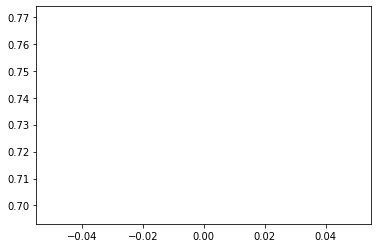

epoch 5000 loss 0.5138609409332275


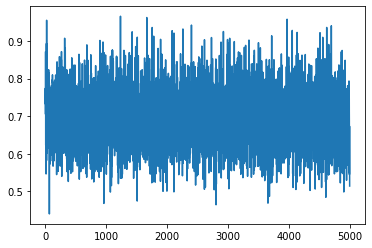

epoch 10000 loss 0.6587069630622864


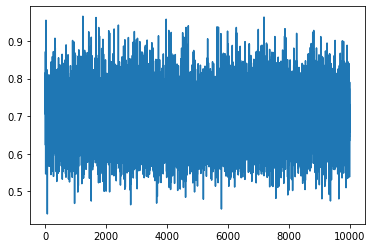

epoch 15000 loss 0.7401736974716187


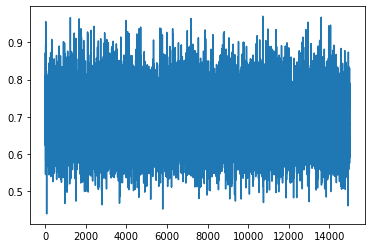

epoch 20000 loss 0.8259484171867371


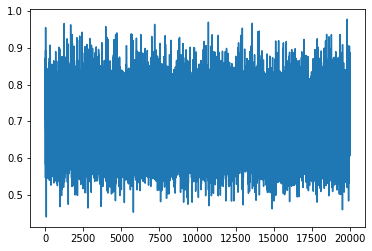

epoch 25000 loss 0.745003342628479


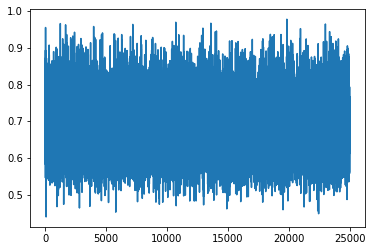

epoch 30000 loss 0.7217628359794617


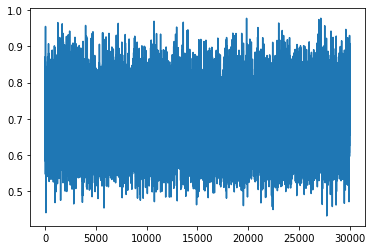

epoch 35000 loss 0.5740017294883728


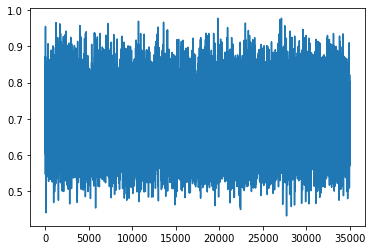

epoch 40000 loss 0.7865885496139526


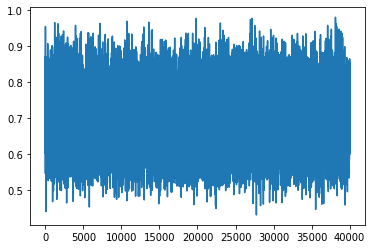

epoch 45000 loss 0.5874296426773071


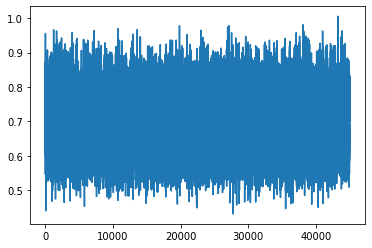

epoch 50000 loss 0.7681576609611511


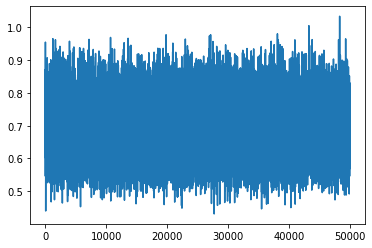

epoch 55000 loss 0.6905332803726196


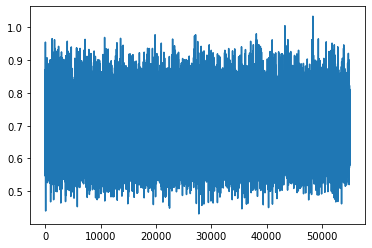

epoch 60000 loss 0.723328173160553


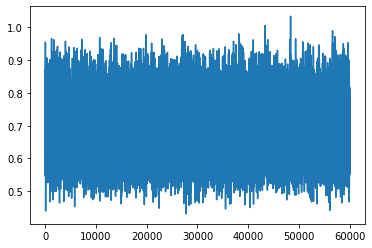

epoch 65000 loss 0.8700875043869019


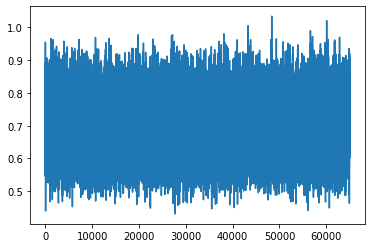

epoch 70000 loss 0.6229009628295898


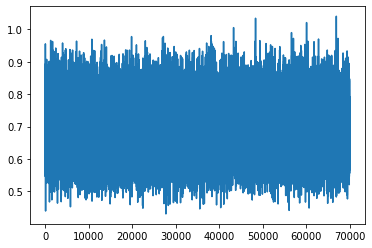

epoch 75000 loss 0.7125117778778076


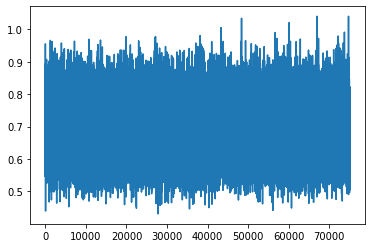

epoch 80000 loss 0.5921464562416077


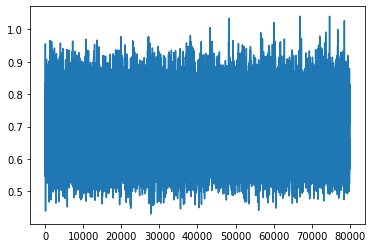

epoch 85000 loss 0.659416675567627


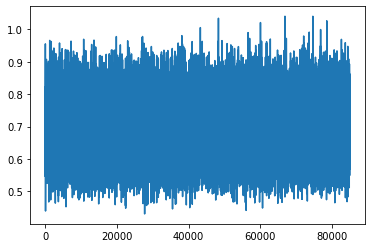

epoch 90000 loss 0.6499844193458557


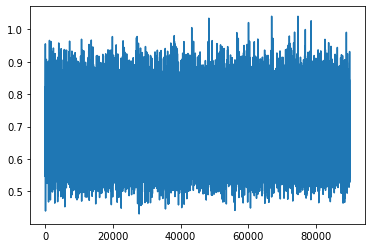

epoch 95000 loss 0.6153517365455627


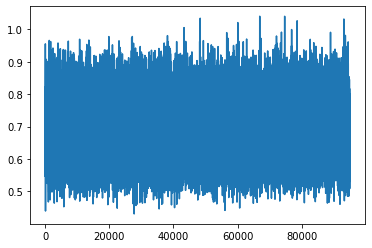

epoch 100000 loss 0.7099722027778625


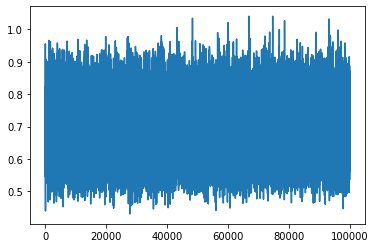

epoch 105000 loss 0.7526121735572815


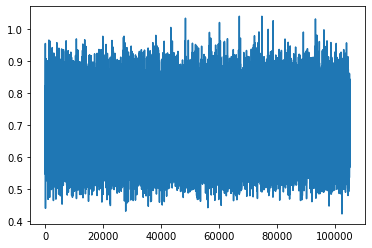

epoch 110000 loss 0.7290051579475403


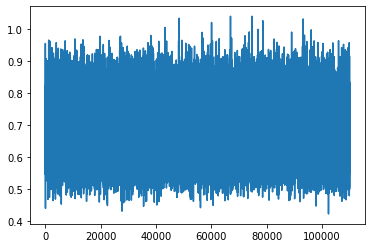

epoch 115000 loss 0.705264687538147


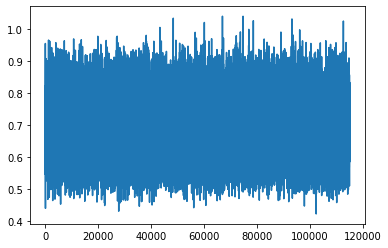

epoch 120000 loss 0.6619107127189636


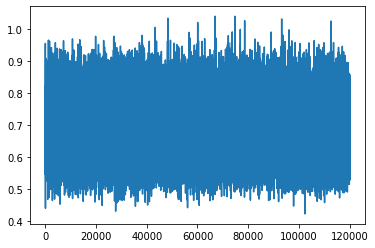

epoch 125000 loss 0.6536148190498352


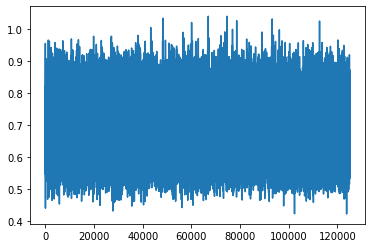

epoch 130000 loss 0.6498227715492249


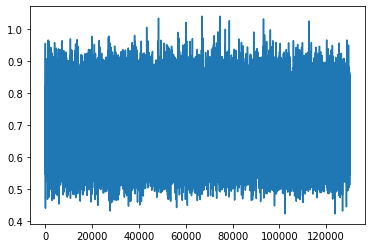

epoch 135000 loss 0.6211942434310913


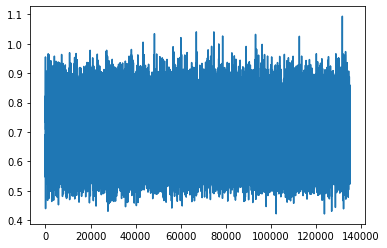

epoch 140000 loss 0.6362162232398987


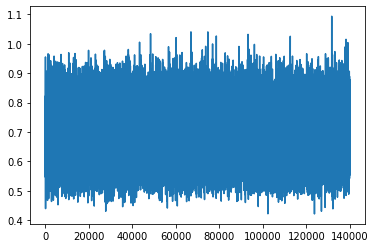

epoch 145000 loss 0.7520020604133606


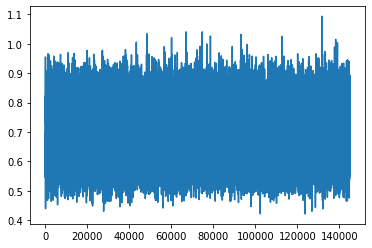

epoch 150000 loss 0.5879766941070557


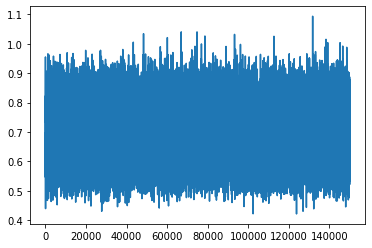

epoch 155000 loss 0.6537226438522339


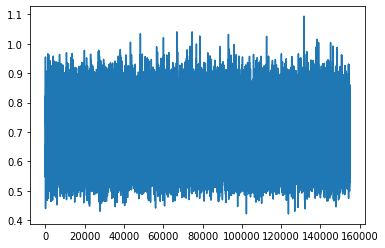

epoch 160000 loss 0.7006171941757202


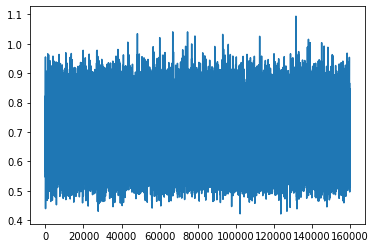

epoch 165000 loss 0.5843901634216309


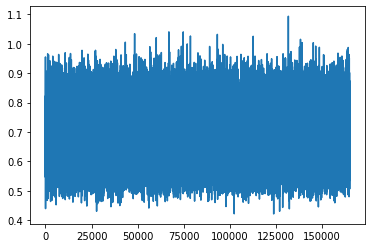

epoch 170000 loss 0.5975816249847412


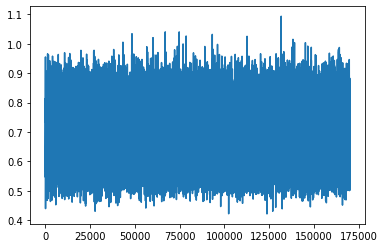

epoch 175000 loss 0.792989194393158


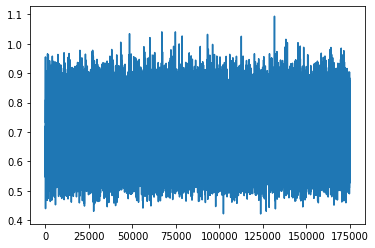

epoch 180000 loss 0.7337189316749573


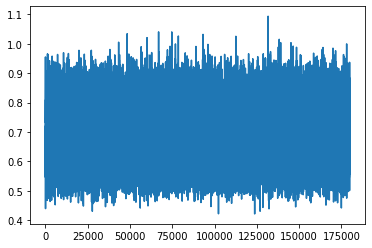

epoch 185000 loss 0.712332010269165


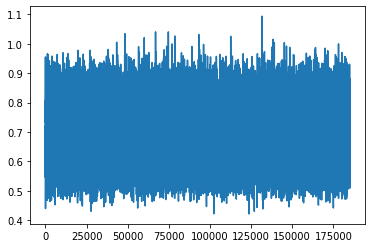

epoch 190000 loss 0.5387977361679077


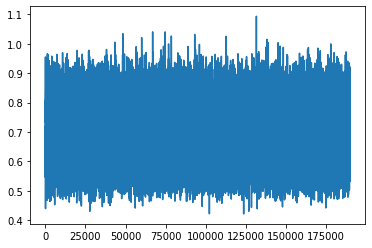

epoch 195000 loss 0.7413634061813354


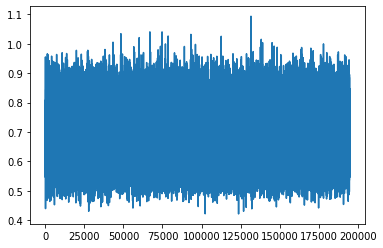

epoch 200000 loss 0.7677189111709595


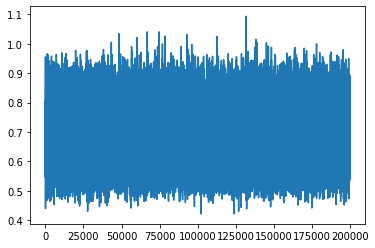

epoch 205000 loss 0.7394838333129883


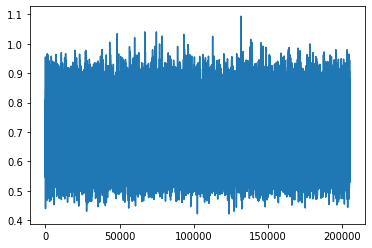

epoch 210000 loss 0.6923514008522034


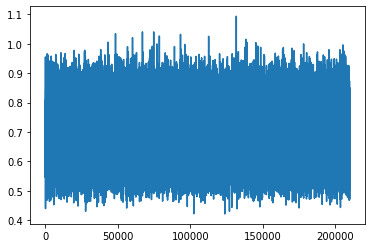

epoch 215000 loss 0.7097997069358826


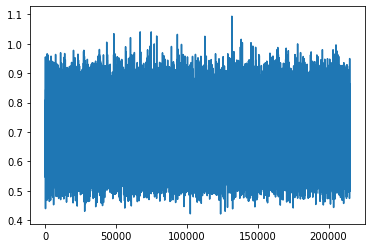

epoch 220000 loss 0.7665919661521912


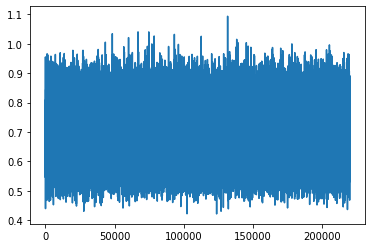

epoch 225000 loss 0.7038194537162781


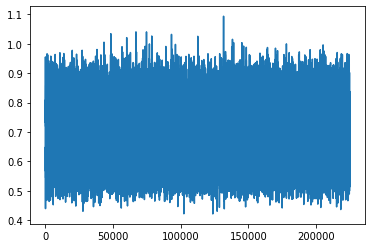

epoch 230000 loss 0.6909507513046265


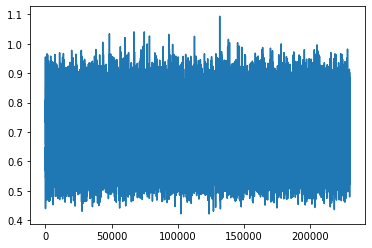

epoch 235000 loss 0.7832983732223511


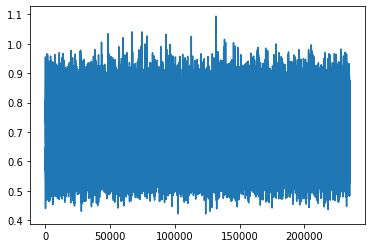

epoch 240000 loss 0.6673580408096313


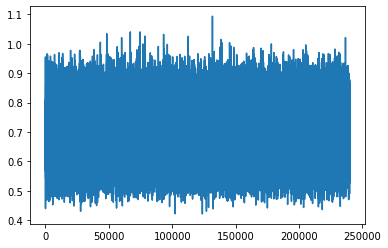

epoch 245000 loss 0.7325165867805481


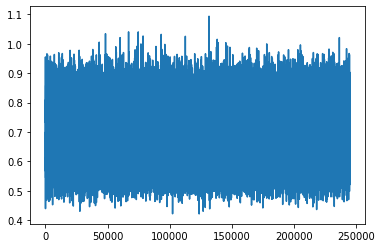

epoch 250000 loss 0.7300935387611389


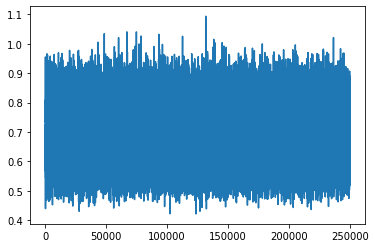

epoch 255000 loss 0.6738383769989014


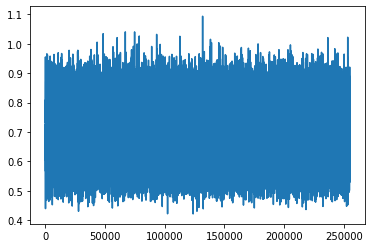

epoch 260000 loss 0.7556419968605042


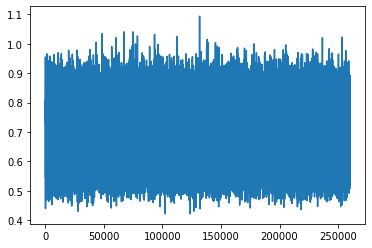

epoch 265000 loss 0.6938791871070862


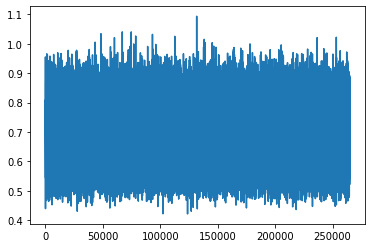

epoch 270000 loss 0.7169733047485352


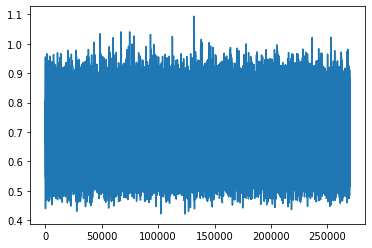

epoch 275000 loss 0.6542764902114868


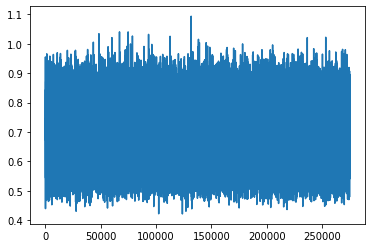

epoch 280000 loss 0.7618289589881897


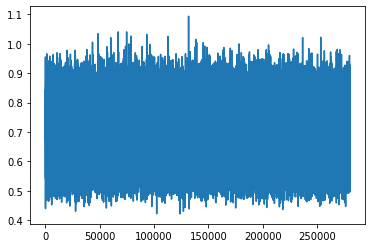

epoch 285000 loss 0.6469765901565552


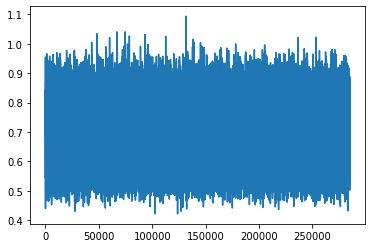

epoch 290000 loss 0.5968803763389587


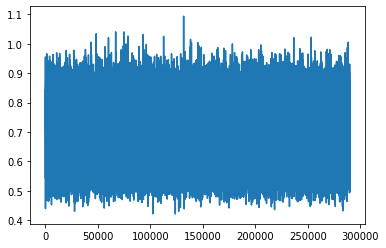

epoch 295000 loss 0.7851161360740662


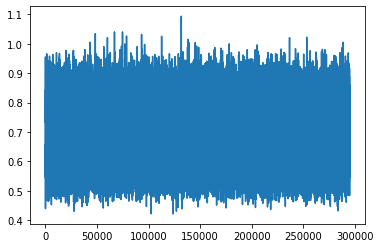

epoch 300000 loss 0.5734780430793762


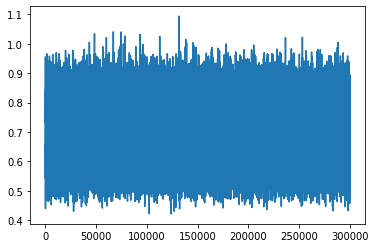

epoch 305000 loss 0.6921788454055786


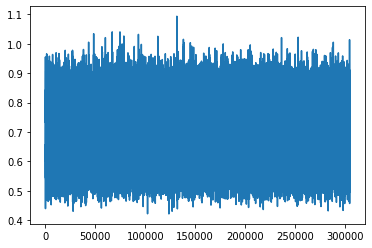

epoch 310000 loss 0.5930577516555786


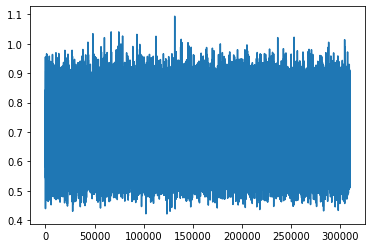

epoch 315000 loss 0.6152428388595581


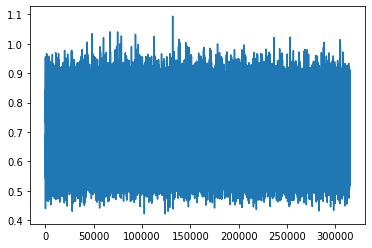

epoch 320000 loss 0.6727619767189026


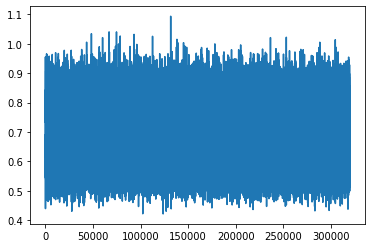

epoch 325000 loss 0.7595083117485046


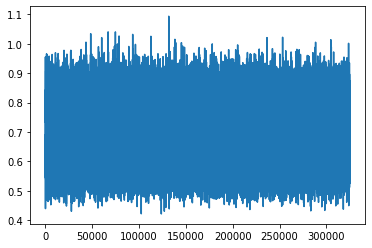

epoch 330000 loss 0.6742978692054749


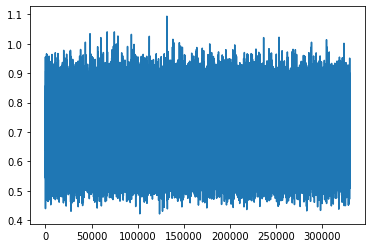

epoch 335000 loss 0.8205534815788269


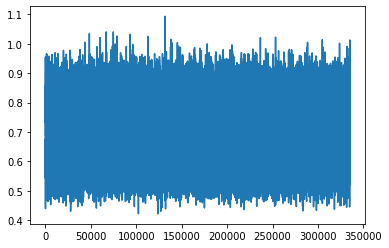

epoch 340000 loss 0.6285093426704407


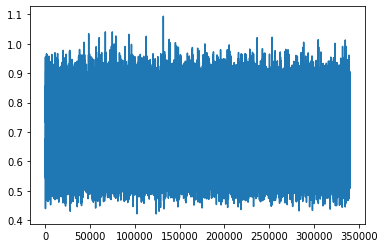

epoch 345000 loss 0.559028148651123


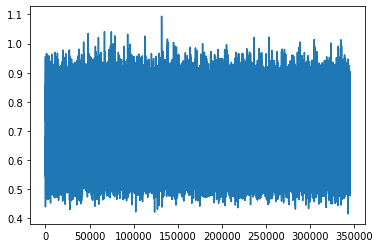

epoch 350000 loss 0.6551861763000488


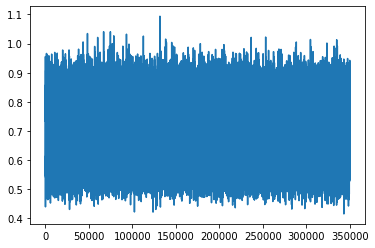

epoch 355000 loss 0.5945888757705688


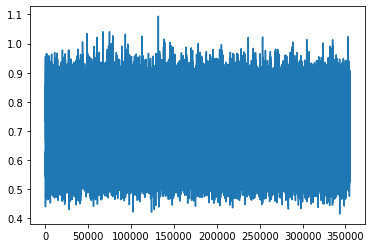

epoch 360000 loss 0.6743396520614624


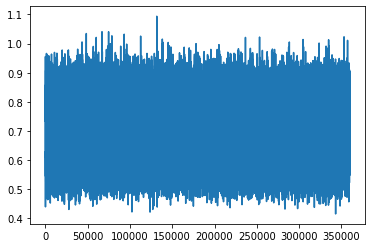

epoch 365000 loss 0.6302332878112793


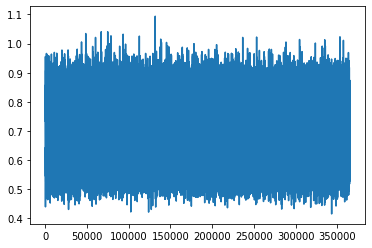

epoch 370000 loss 0.7046170234680176


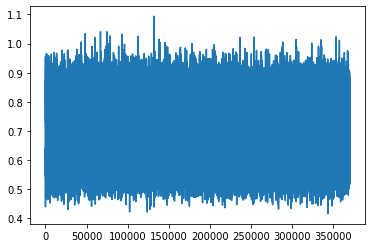

epoch 375000 loss 0.9355178475379944


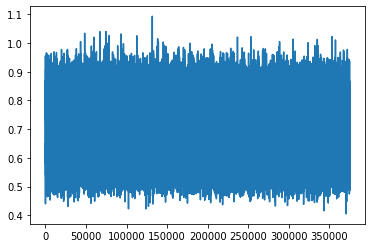

epoch 380000 loss 0.6946969032287598


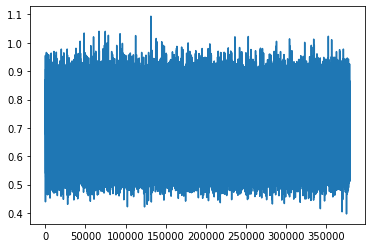

epoch 385000 loss 0.8092923164367676


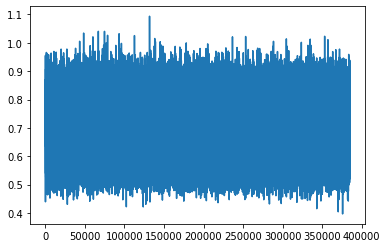

epoch 390000 loss 0.7221389412879944


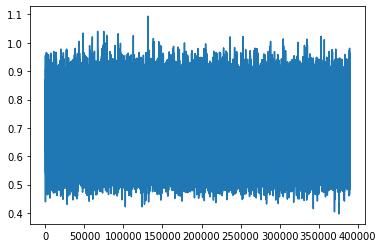

epoch 395000 loss 0.6616770029067993


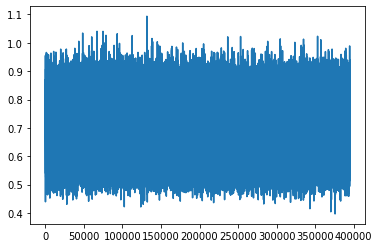

epoch 400000 loss 0.6405588388442993


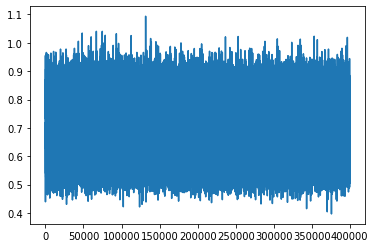

epoch 405000 loss 0.655930757522583


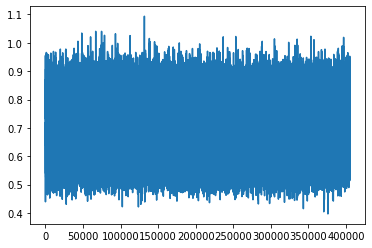

epoch 410000 loss 0.6809566020965576


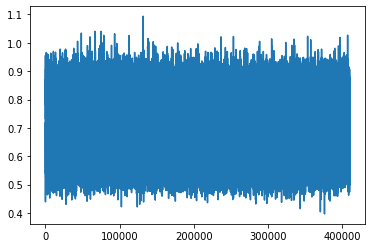

epoch 415000 loss 0.6257224678993225


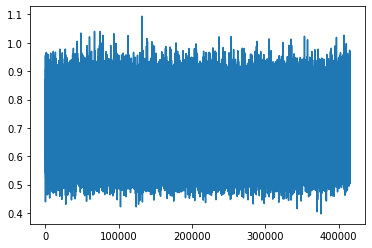

epoch 420000 loss 0.7099016904830933


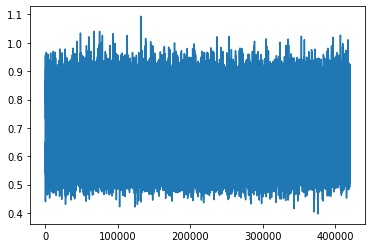

epoch 425000 loss 0.6639392375946045


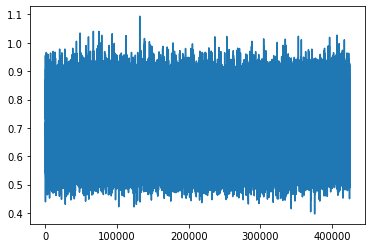

epoch 430000 loss 0.6841763854026794


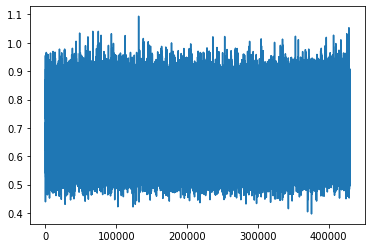

epoch 435000 loss 0.6748301982879639


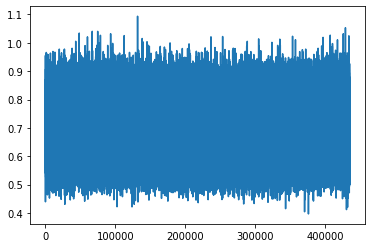

epoch 440000 loss 0.6318124532699585


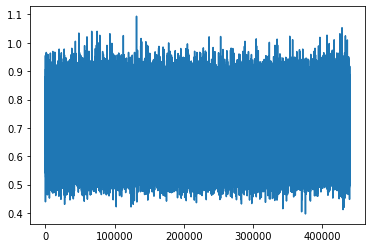

epoch 445000 loss 0.7548680901527405


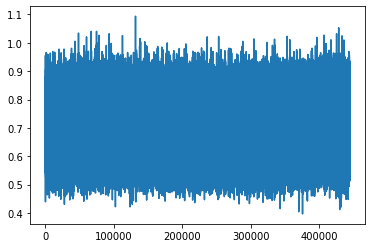

epoch 450000 loss 0.8144612908363342


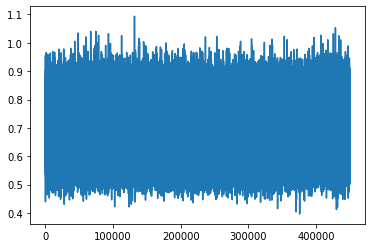

epoch 455000 loss 0.5430203080177307


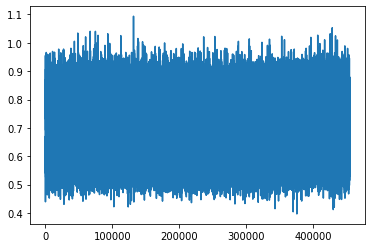

epoch 460000 loss 0.6298716068267822


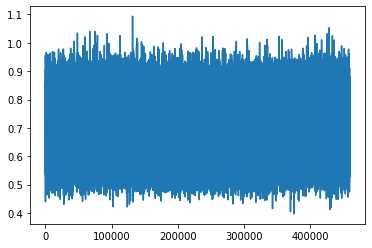

epoch 465000 loss 0.7843267917633057


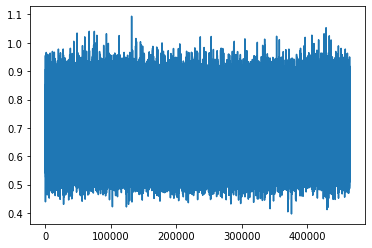

epoch 470000 loss 0.7595962882041931


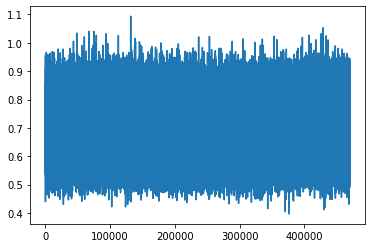

epoch 475000 loss 0.6388123035430908


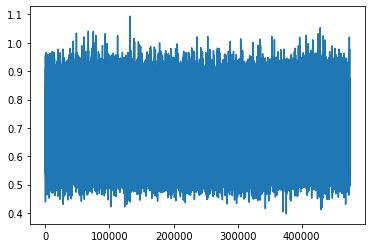

epoch 480000 loss 0.6029923558235168


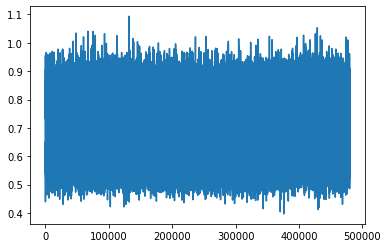

epoch 485000 loss 0.6349963545799255


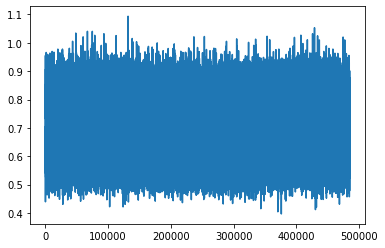

epoch 490000 loss 0.5857082009315491


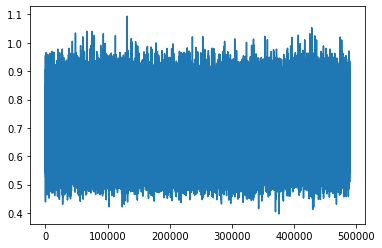

epoch 495000 loss 0.6739142537117004


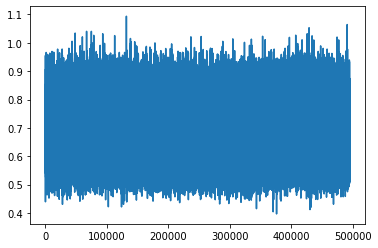

epoch 500000 loss 0.7442103028297424


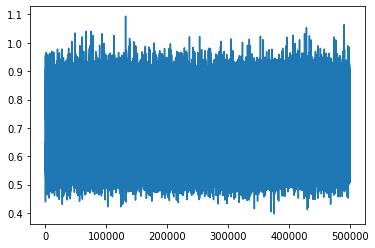

epoch 505000 loss 0.6667556166648865


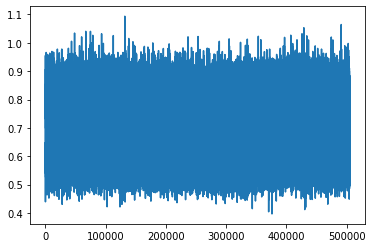

epoch 510000 loss 0.8423296213150024


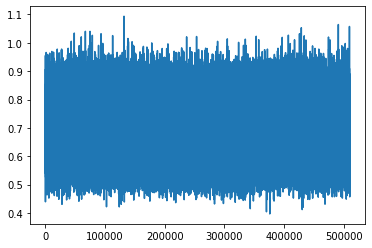

epoch 515000 loss 0.7603430151939392


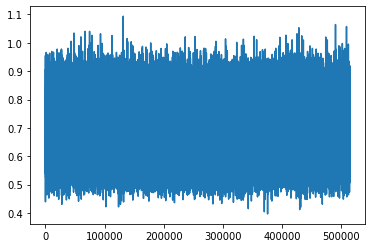

epoch 520000 loss 0.6277608275413513


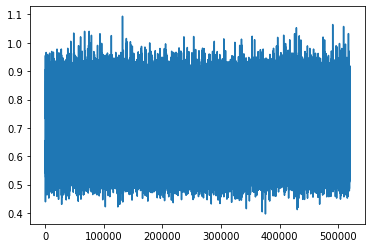

epoch 525000 loss 0.6492295265197754


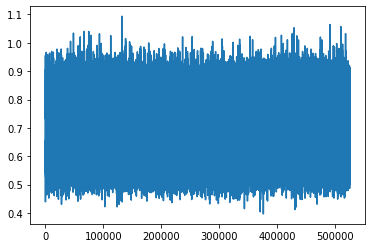

epoch 530000 loss 0.7468630075454712


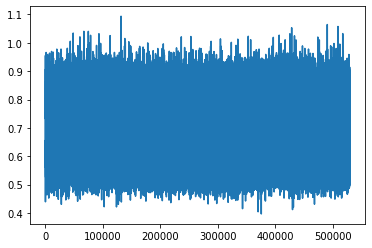

epoch 535000 loss 0.6547876596450806


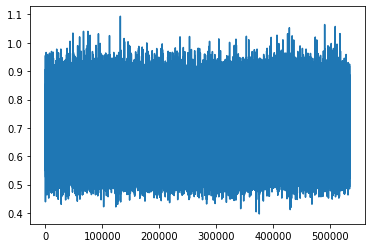

epoch 540000 loss 0.6451795101165771


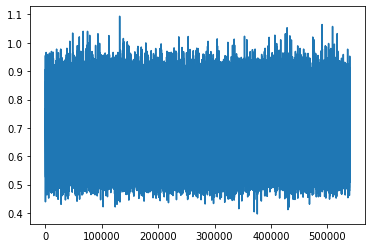

epoch 545000 loss 0.8399856686592102


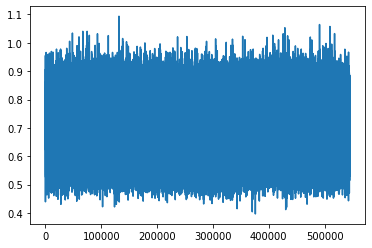

epoch 550000 loss 0.7494024038314819


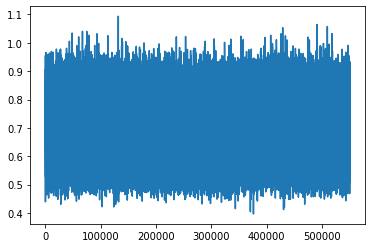

epoch 555000 loss 0.7254655957221985


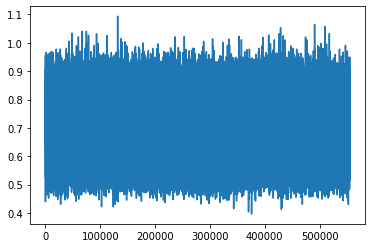

epoch 560000 loss 0.6139142513275146


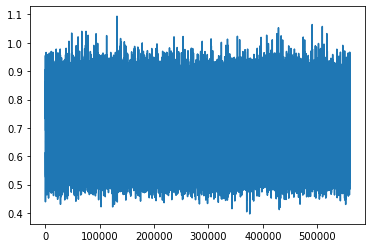

epoch 565000 loss 0.7890857458114624


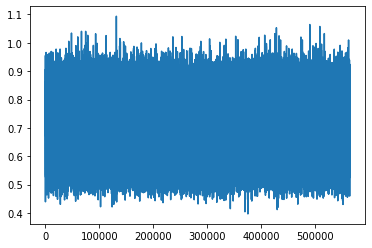

epoch 570000 loss 0.6934562921524048


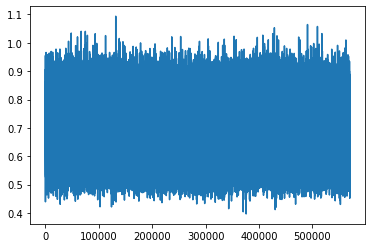

epoch 575000 loss 0.6784201264381409


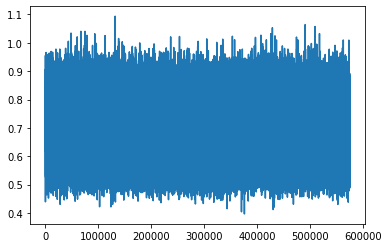

epoch 580000 loss 0.8443855047225952


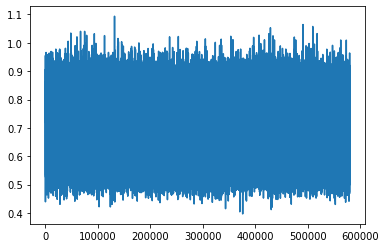

epoch 585000 loss 0.7153161764144897


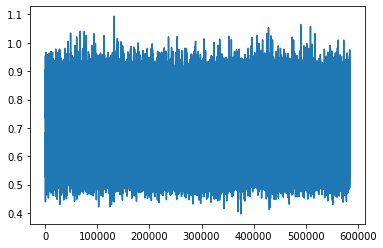

epoch 590000 loss 0.6324008107185364


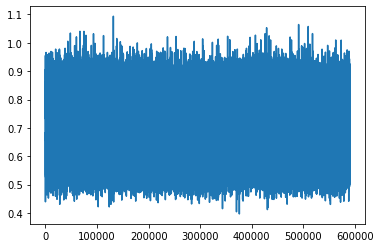

epoch 595000 loss 0.7406520247459412


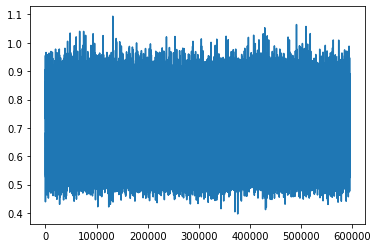

epoch 600000 loss 0.6672803163528442


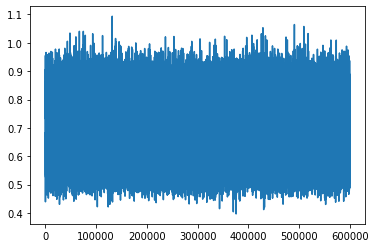

epoch 605000 loss 0.6408557891845703


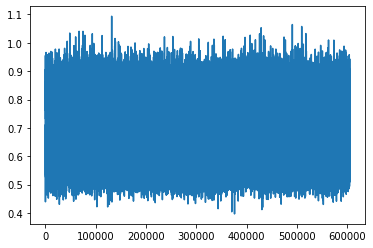

epoch 610000 loss 0.6729961037635803


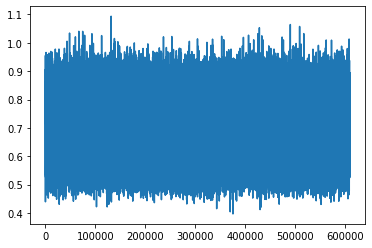

epoch 615000 loss 0.6458256840705872


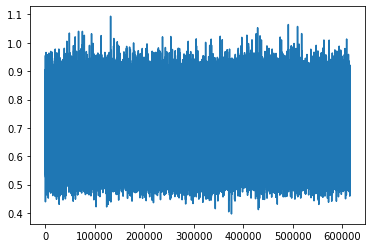

epoch 620000 loss 0.6727743148803711


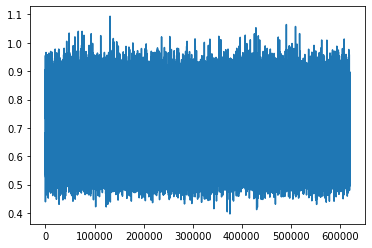

epoch 625000 loss 0.6312875747680664


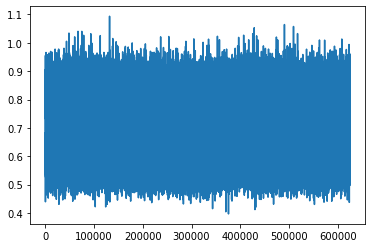

epoch 630000 loss 0.6783217787742615


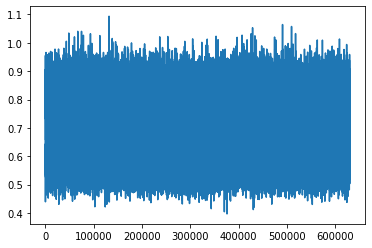

epoch 635000 loss 0.5863986015319824


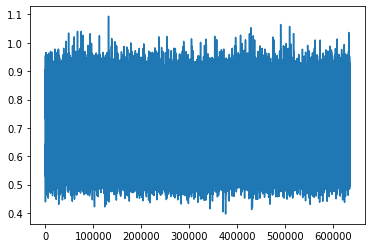

epoch 640000 loss 0.7014584541320801


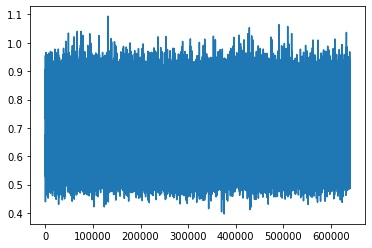

epoch 645000 loss 0.8290695548057556


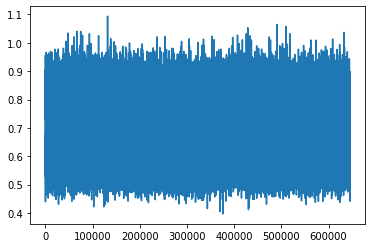

epoch 650000 loss 0.74861079454422


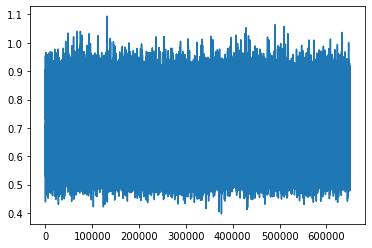

epoch 655000 loss 0.6971070170402527


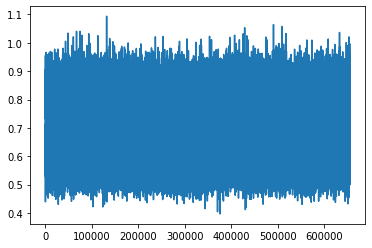

epoch 660000 loss 0.6278861165046692


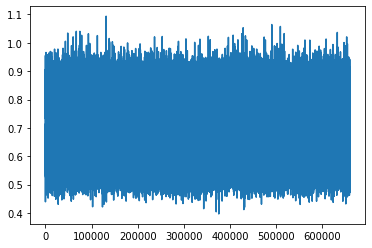

epoch 665000 loss 0.685723066329956


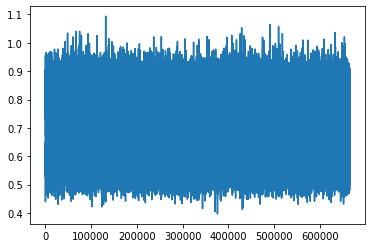

epoch 670000 loss 0.7319457530975342


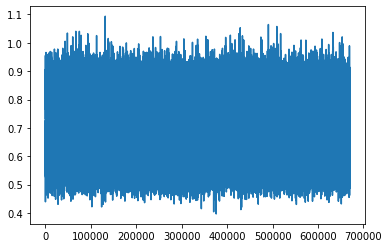

epoch 675000 loss 0.6009426712989807


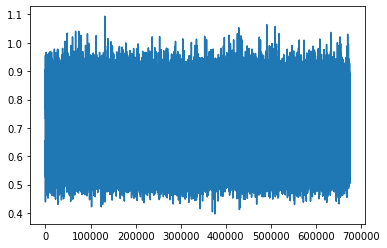

epoch 680000 loss 0.650797426700592


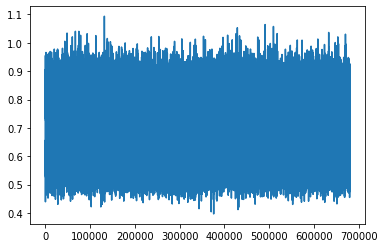

epoch 685000 loss 0.7260618805885315


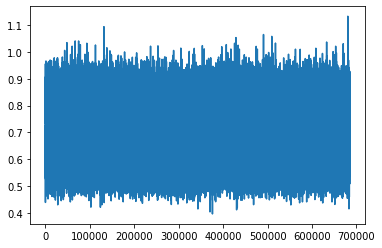

epoch 690000 loss 0.6965025663375854


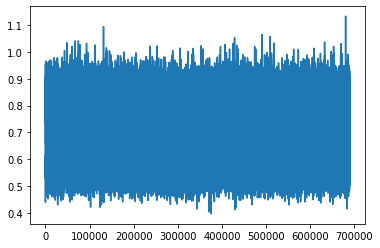

epoch 695000 loss 0.5610640645027161


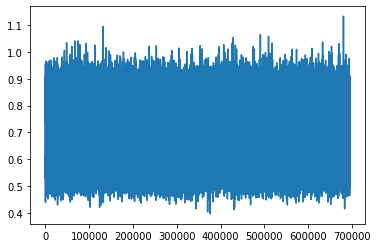

epoch 700000 loss 0.7489322423934937


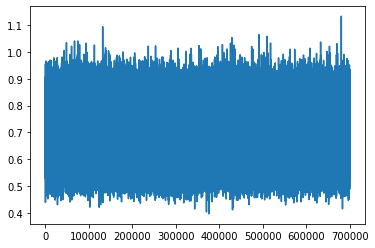

epoch 705000 loss 0.7085276246070862


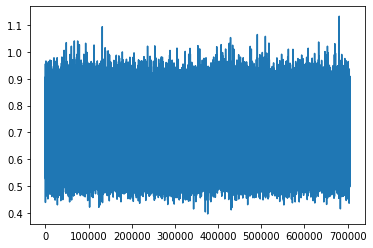

epoch 710000 loss 0.7845900058746338


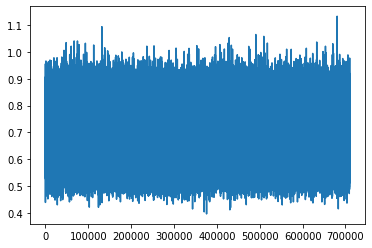

epoch 715000 loss 0.6495506763458252


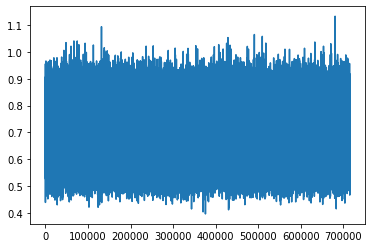

epoch 720000 loss 0.6859192252159119


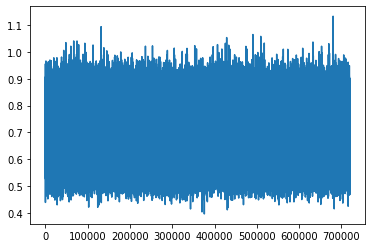

epoch 725000 loss 0.8001832365989685


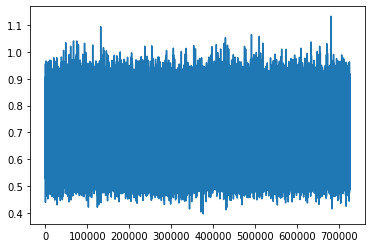

epoch 730000 loss 0.8252954483032227


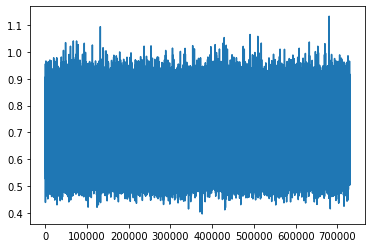

epoch 735000 loss 0.7464391589164734


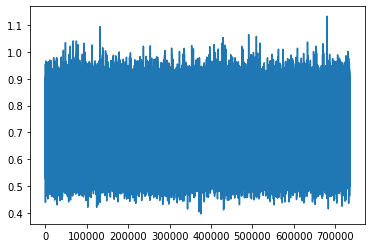

epoch 740000 loss 0.7560597062110901


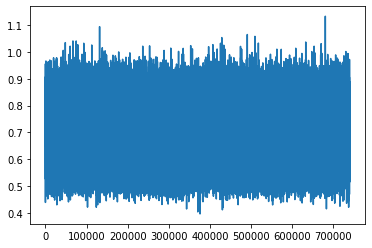

epoch 745000 loss 0.6247386336326599


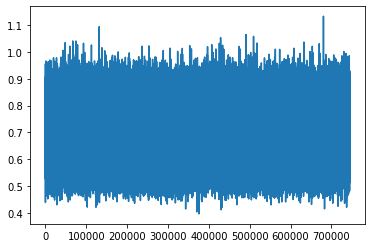

epoch 750000 loss 0.6686396598815918


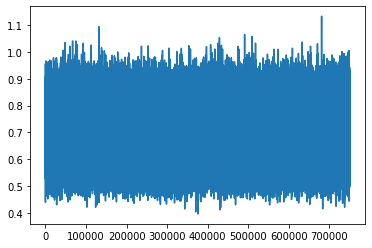

epoch 755000 loss 0.6431704759597778


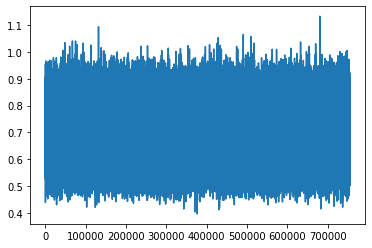

epoch 760000 loss 0.7253749966621399


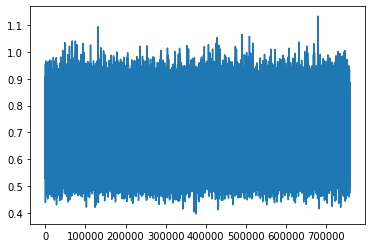

epoch 765000 loss 0.7003956437110901


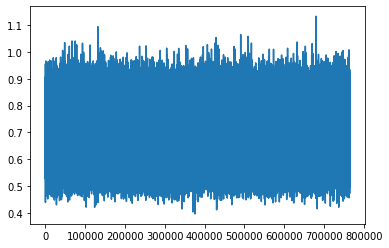

epoch 770000 loss 0.5997493863105774


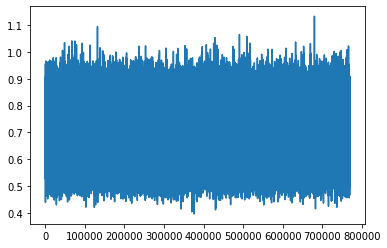

epoch 775000 loss 0.6834160089492798


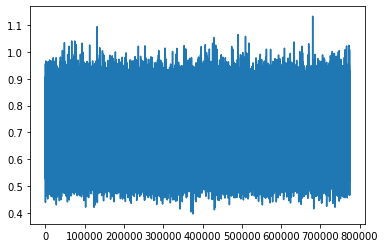

epoch 780000 loss 0.7043987512588501


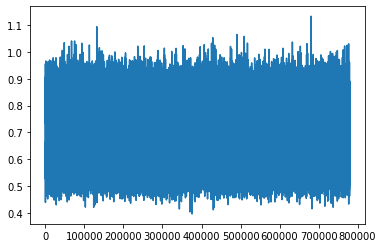

epoch 785000 loss 0.6545395255088806


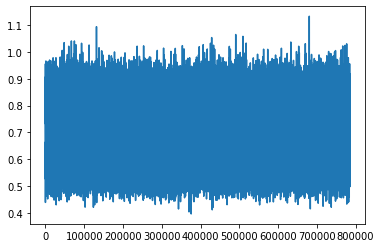

epoch 790000 loss 0.762753963470459


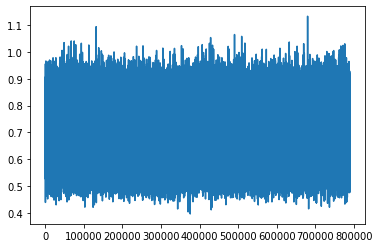

epoch 795000 loss 0.7034267783164978


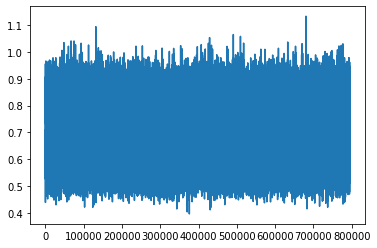

epoch 800000 loss 0.5991718769073486


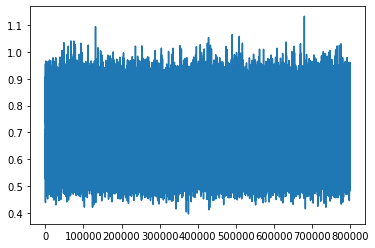

epoch 805000 loss 0.7590396404266357


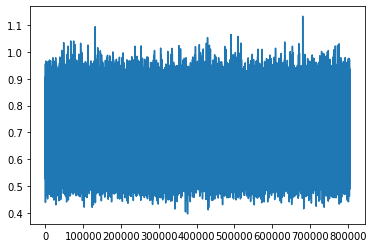

epoch 810000 loss 0.752524197101593


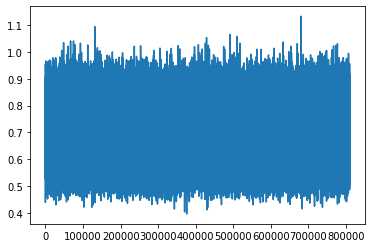

epoch 815000 loss 0.7068411707878113


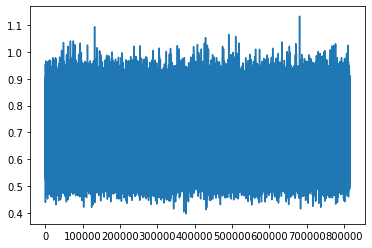

epoch 820000 loss 0.6161168813705444


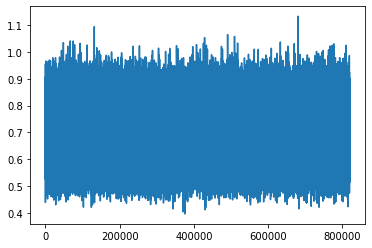

epoch 825000 loss 0.9793530702590942


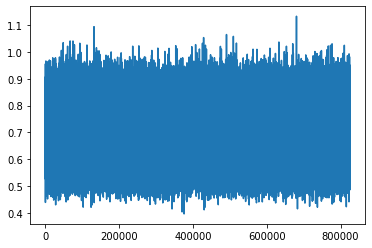

epoch 830000 loss 0.660592794418335


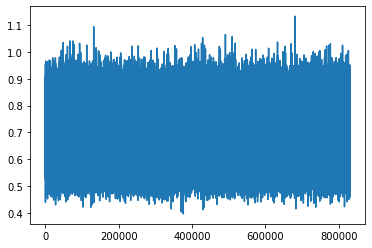

epoch 835000 loss 0.6924906969070435


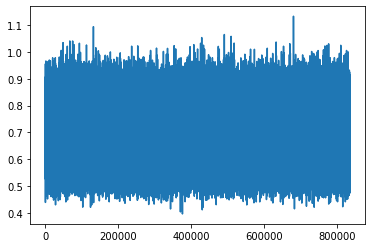

epoch 840000 loss 0.6380957365036011


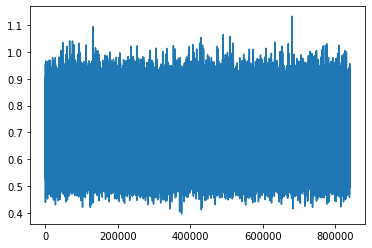

epoch 845000 loss 0.7071979641914368


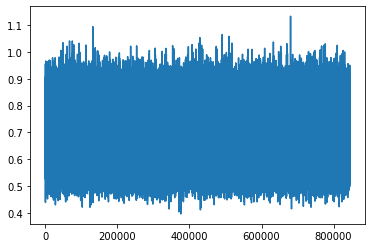

epoch 850000 loss 0.6469830274581909


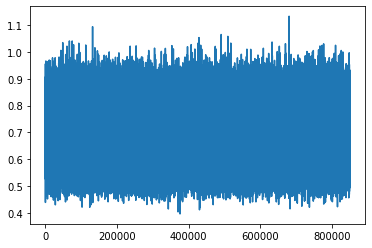

epoch 855000 loss 0.6476590633392334


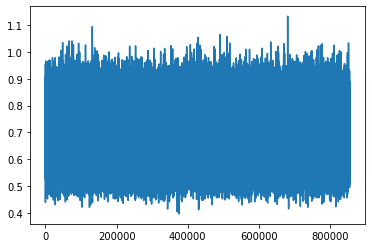

epoch 860000 loss 0.7575879693031311


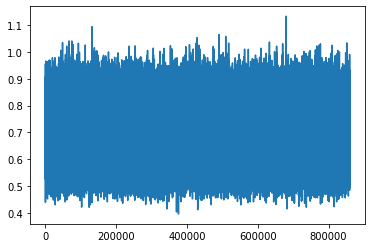

epoch 865000 loss 0.7157633304595947


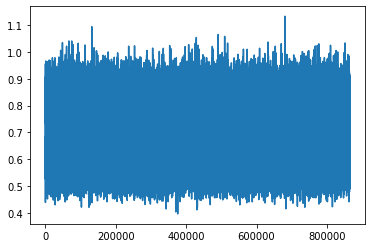

epoch 870000 loss 0.6473743915557861


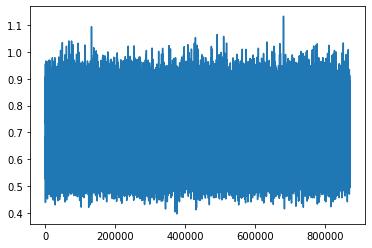

epoch 875000 loss 0.7772169709205627


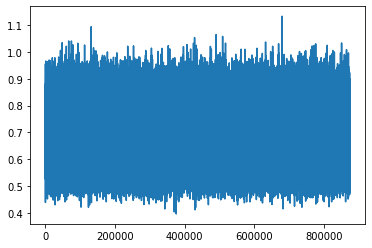

epoch 880000 loss 0.5795409679412842


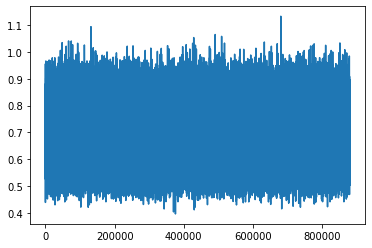

epoch 885000 loss 0.6774042844772339


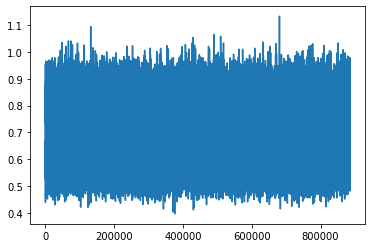

epoch 890000 loss 0.6129980087280273


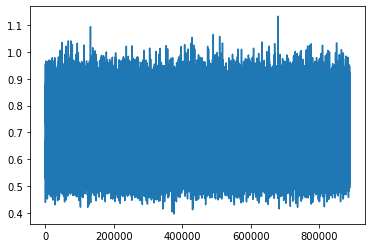

epoch 895000 loss 0.7728781700134277


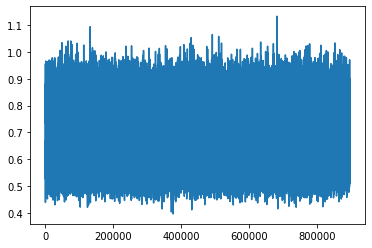

epoch 900000 loss 0.6034865975379944


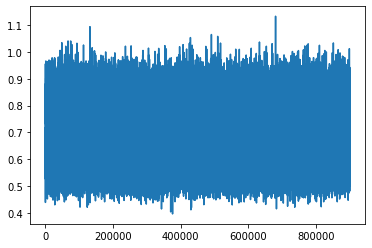

epoch 905000 loss 0.6850079894065857


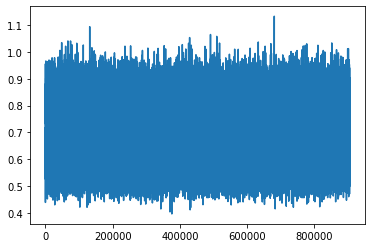

epoch 910000 loss 0.7728387713432312


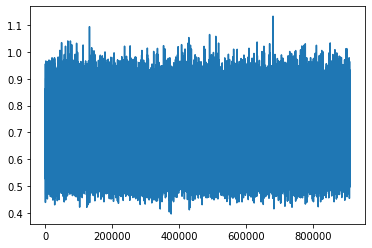

epoch 915000 loss 0.6413297057151794


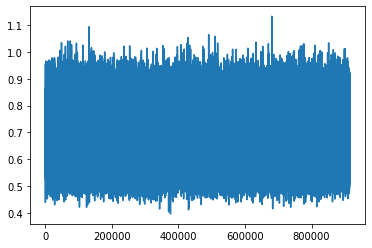

epoch 920000 loss 0.7058823108673096


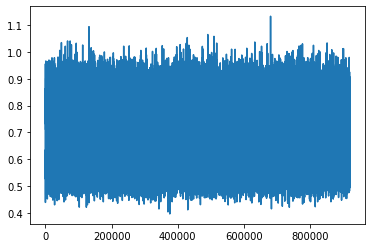

epoch 925000 loss 0.7159373164176941


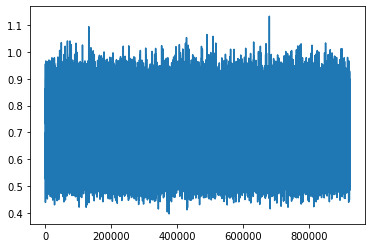

epoch 930000 loss 0.6383742094039917


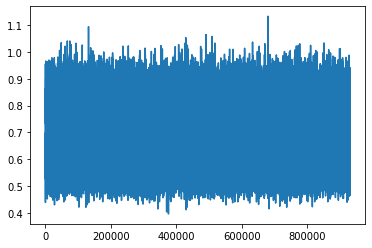

epoch 935000 loss 0.7010723948478699


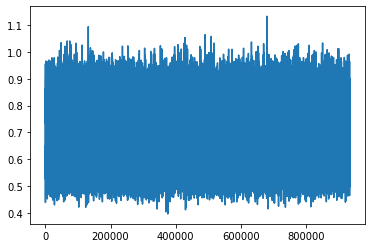

epoch 940000 loss 0.7090767621994019


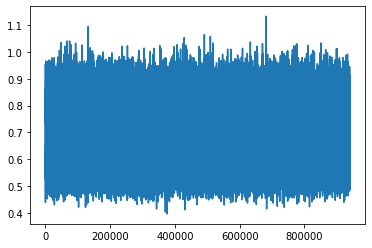

epoch 945000 loss 0.5800095796585083


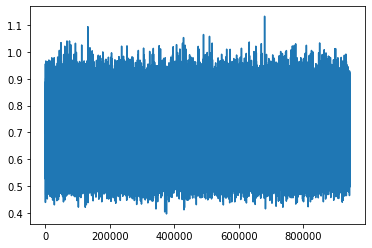

epoch 950000 loss 0.6595684289932251


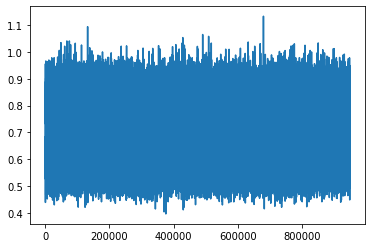

epoch 955000 loss 0.6471243500709534


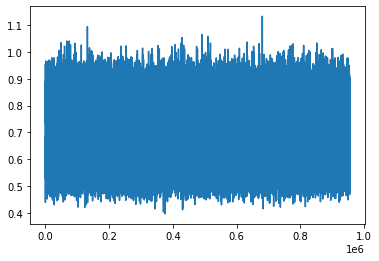

epoch 960000 loss 0.7684258222579956


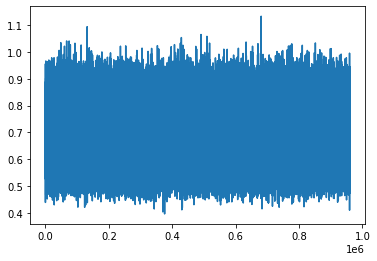

epoch 965000 loss 0.612663984298706


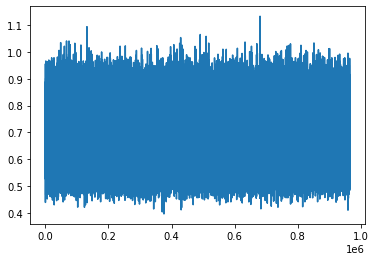

epoch 970000 loss 0.6372302770614624


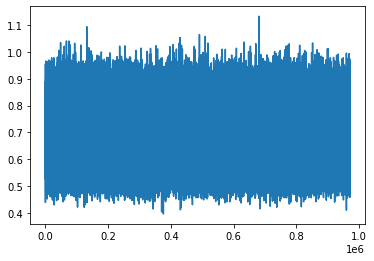

epoch 975000 loss 0.7408555746078491


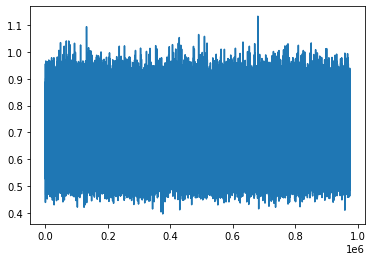

epoch 980000 loss 0.8908393383026123


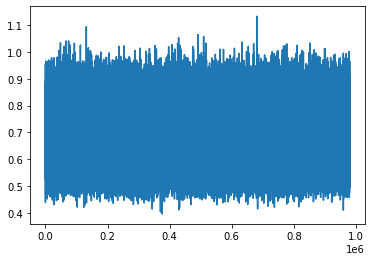

epoch 985000 loss 0.6552181243896484


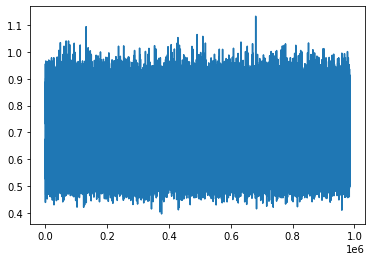

epoch 990000 loss 0.6462493538856506


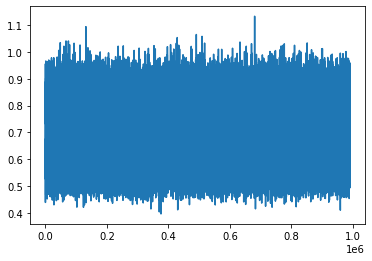

epoch 995000 loss 0.6509289145469666


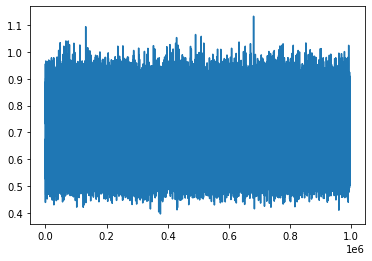

In [315]:
loss_list = []
for ep in range(epochs):
    preds=[]
    for _ in range(batch_size):
        for index,(p,w) in enumerate(zip(ps[:n_],ws[:n_])):
            # print('item ',index)
            if p.predict():
                preds.extend([0,1])
            else:
                preds.extend([1,0])

    data_x = torch.tensor(preds).type(torch.FloatTensor)
    data_x = data_x.reshape(batch_size,-1,2)

    data_y = torch.tensor([Joint.predict() for i in range((batch_size))]).reshape(batch_size)\
        .type(torch.LongTensor)
    predict_outputs = model(data_x)
    # print('dy',data_y)
    # print('po',predict_outputs)
    # loss = loss_func(predict_outputs.type(torch.FloatTensor).requires_grad_(),data_y)
    loss = loss_func(predict_outputs.type(torch.FloatTensor),data_y)


    optimizer.zero_grad()  # clear gradients for this training step
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    loss_list.append(loss.item())
    if ep%5000==0:
        model.eval()
        dbg('epoch',ep,'loss',loss.item())
        # for name, param in model.named_parameters():
        #     print('layer param ',name,param,param.dtype)
        preds=[]
        for _ in range(batch_size):
            for index,(p,w) in enumerate(zip(ps[:n_],ws[:n_])):
                # print('item ',index)
                if p.predict():
                    preds.extend([0,1])
                else:
                    preds.extend([1,0])

        data_x = torch.tensor(preds).type(torch.FloatTensor)
        data_x = data_x.reshape(batch_size,-1,2)
        predict_outputs = model(data_x)
        # print('predictions ',predict_outputs)
        model.train()
        plt.plot(loss_list)
        plt.show()

In [316]:
for name, param in model.named_parameters():
    print('layer param ',name,param,param.dtype)

layer param  W Parameter containing:
tensor([0.9776, 1.4327, 1.4019, 1.0000, 1.0000], requires_grad=True) torch.float32
